In [2]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchmetrics import Accuracy, Precision, Recall

In [3]:
# Load datasets
from torchvision import datasets
import torchvision.transforms as transforms

train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [4]:
# Train vs Test data sizes
print(f"Number of training samples: {len(train_data)}")
print(f"Number of test samples: {len(test_data)}")

Number of training samples: 60000
Number of test samples: 10000


In [5]:
# Class names and number of classes
print("Classes:", train_data.classes)
num_classes = len(train_data.classes)
print("Number of classes:", num_classes)

Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Number of classes: 10


In [6]:
# Example data point
image, label = train_data[0]
print(image.shape)
print("Label:", label)

torch.Size([1, 28, 28])
Label: 9


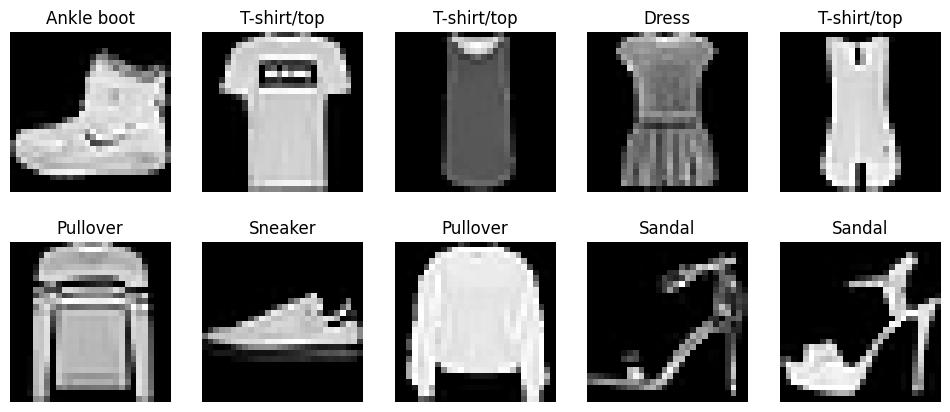

In [ ]:
# Visualize some sample images from the training set
fig, axes = plt.subplots(2, 5, figsize=(12,5))
for i, ax in enumerate(axes.flatten()):
    img, lbl = train_data[i]
    ax.imshow(img.squeeze(), cmap='gray')  # remove channel dimension
    ax.set_title(train_data.classes[lbl])
    ax.axis('off')
plt.show()

In [ ]:
# Pixel value statistics
image, label = train_data[0]
print("Min pixel value:", image.min())
print("Max pixel value:", image.max())
print("Mean pixel value:", image.mean())

Min pixel value: tensor(0.)
Max pixel value: tensor(1.)
Mean pixel value: tensor(0.3814)


In [ ]:
# Class distribution in training data
labels = np.array([label for _, label in train_data])
for i, cls in enumerate(train_data.classes):
    print(f"{cls}: {np.sum(labels == i)} samples")

T-shirt/top: 6000 samples
Trouser: 6000 samples
Pullover: 6000 samples
Dress: 6000 samples
Coat: 6000 samples
Sandal: 6000 samples
Shirt: 6000 samples
Sneaker: 6000 samples
Bag: 6000 samples
Ankle boot: 6000 samples


In [7]:
# DataLoaders
dataloader_train = DataLoader(
    train_data,
    shuffle = True,
    batch_size = 1,
)

dataloader_test = DataLoader(
    test_data,
    shuffle = False,
    batch_size = 1,
)

In [8]:
image, label = next(iter(dataloader_train))
print(image.shape)

torch.Size([1, 1, 28, 28])


In [9]:
# Define the model
model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size = 3, padding = 1),
    nn.ELU(),
    nn.MaxPool2d(kernel_size = 2),
    nn.Conv2d(32,64, kernel_size = 3, padding = 1),
    nn.ELU(),
    nn.MaxPool2d(kernel_size = 2),
    nn.Flatten(),
    nn.Linear(64 * 7 * 7, num_classes)
)

In [10]:
# Training loop
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

for epoch in range(2):
    running_loss = 0.0
    for images, labels in dataloader_train:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

In [11]:
# Evaluation

predictions = []
true_labels = []

precision_ = Precision(
    task = "multiclass", num_classes= num_classes, average = None
)

recall_ = Recall(
    task = "multiclass", num_classes= num_classes, average = None
)

accuracy_ = Accuracy(
    task = "multiclass", num_classes= num_classes
)

model.eval()
with torch.no_grad():
    for images, labels in dataloader_test:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        predictions.append(preds.item())
        true_labels.append(labels.item())
        precision_(preds, labels)
        recall_(preds, labels)
        accuracy_(preds, labels)  

In [15]:
# Final metrics
precision = precision_.compute().tolist()
print(f"Precision per class: {precision}")
recall = recall_.compute().tolist()
print(f"Recall per class: {recall}")
accuracy = accuracy_.compute().item()
print(f"Overall accuracy: {accuracy}")  

Precision per class: [0.8385744094848633, 0.9928205013275146, 0.7649092674255371, 0.8530762195587158, 0.811188817024231, 0.9683481454849243, 0.7208238244056702, 0.9501991868019104, 0.9946751594543457, 0.9638554453849792]
Recall per class: [0.800000011920929, 0.9679999947547913, 0.8849999904632568, 0.9290000200271606, 0.8119999766349792, 0.9789999723434448, 0.6299999952316284, 0.9539999961853027, 0.9340000152587891, 0.9599999785423279]
Overall accuracy: 0.8851000070571899
